In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2022-08-18 18:12:36.630955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-18 18:12:36.631025: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

2022-08-18 18:13:06.934375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-18 18:13:06.934456: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-18 18:13:06.934523: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Kalki): /proc/driver/nvidia/version does not exist
2022-08-18 18:13:06.935219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 19s - loss: 0.0308 - 19s/epoch - 533ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0112 - 8s/epoch - 217ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0082 - 6s/epoch - 181ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0072 - 8s/epoch - 218ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0114 - 7s/epoch - 208ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 186ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0067 - 6s/epoch - 178ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0073 - 6s/epoch - 179ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0063 - 6s/epoch - 182ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 193ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0057 - 6s/epoch - 181ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 189ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0051 - 6s/epoch - 182ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 187ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0052 - 6s/epoch - 180ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0072 - 6s/epoch - 181ms/step
Epoch 17/20
35/

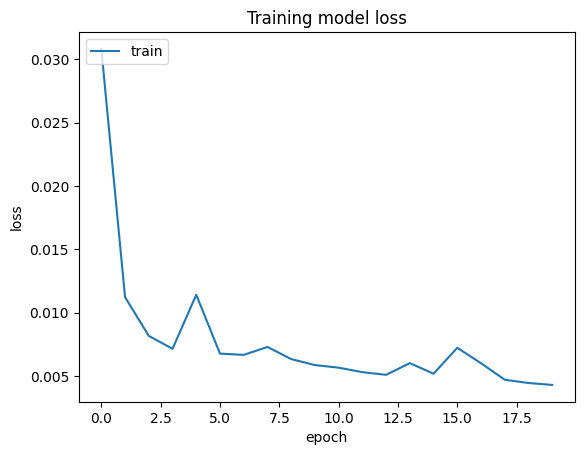

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 63ms/step


array([[1.1947266],
       [1.1959529],
       [1.2066903],
       [1.2227272],
       [1.2342117],
       [1.231032 ],
       [1.2154336],
       [1.1967816],
       [1.1867645],
       [1.1860313],
       [1.1805582],
       [1.1699901],
       [1.1608316],
       [1.152414 ],
       [1.1516043],
       [1.1569589],
       [1.1757511],
       [1.2036855],
       [1.2339256],
       [1.2626358],
       [1.2706438],
       [1.2635456],
       [1.2410544],
       [1.2123199],
       [1.1890683],
       [1.178708 ],
       [1.179557 ],
       [1.1818129],
       [1.175269 ],
       [1.1643916],
       [1.152441 ],
       [1.1389419],
       [1.118475 ],
       [1.0936452],
       [1.0857284],
       [1.0979614],
       [1.1209352],
       [1.1445177],
       [1.1651089],
       [1.1727834],
       [1.1819378],
       [1.1948717],
       [1.2108296],
       [1.2256465],
       [1.235167 ],
       [1.2352498],
       [1.2247349],
       [1.2169987],
       [1.2169259],
       [1.2252476],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

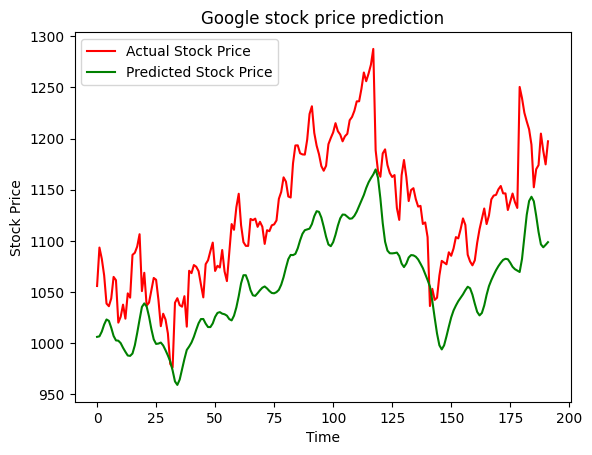

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()